In [52]:
# Basic data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting inline
%matplotlib inline

In [53]:
# Load the CSV file
df = pd.read_csv(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\data\framingham.csv")

# Show the shape and first 5 rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (4240, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [54]:
# Quick overview of data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [55]:
# Statistical summary of numerical features
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [56]:
# Check missing values
missing = df.isnull().sum()
missing[missing > 0]  # Show only columns with missing data

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

Class distribution:
 TenYearCHD
0    3596
1     644
Name: count, dtype: int64


C:\Users\bvdas\AppData\Local\Temp\ipykernel_11212\107649326.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_counts.index, y=target_counts.values / len(df) * 100, palette='pastel')


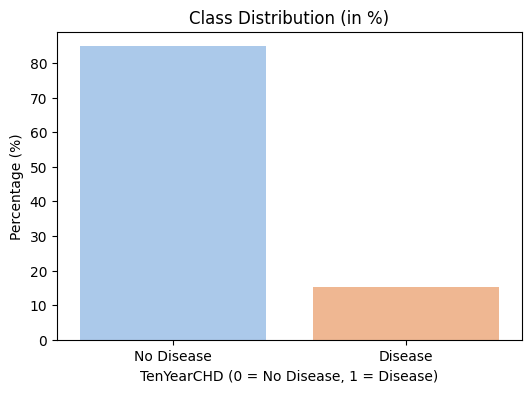

In [57]:
# Class distribution
target_counts = df['TenYearCHD'].value_counts()
print("Class distribution:\n", target_counts)

# Plot as percentage
plt.figure(figsize=(6,4))
sns.barplot(x=target_counts.index, y=target_counts.values / len(df) * 100, palette='pastel')
plt.title("Class Distribution (in %)")
plt.xlabel("TenYearCHD (0 = No Disease, 1 = Disease)")
plt.ylabel("Percentage (%)")
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

In [58]:
print(df.shape)

(4240, 16)


In [59]:
# Check how many missing values per column
missing = df.isnull().sum()
# missing[missing > 0]
print (missing)

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [60]:
# Filling column 'education' with mode - the most common value
df['education'] = df['education'].fillna(df['education'].mode()[0])# mode() returns a Series for mode( 0 1 ), so we use [0] to get the first most frequent value

# Filling numeric columns with median - the middle value(cause it is not affected by outliers)
for col in ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']:
    df[col] = df[col].fillna(df[col].median())

# Filling 'BPMeds' with 0 assuming not on meds
df['BPMeds'] = df['BPMeds'].fillna(0)

# Verifying no missing values remain
print("Total missing values left:", df.isnull().sum().sum())

Total missing values left: 0


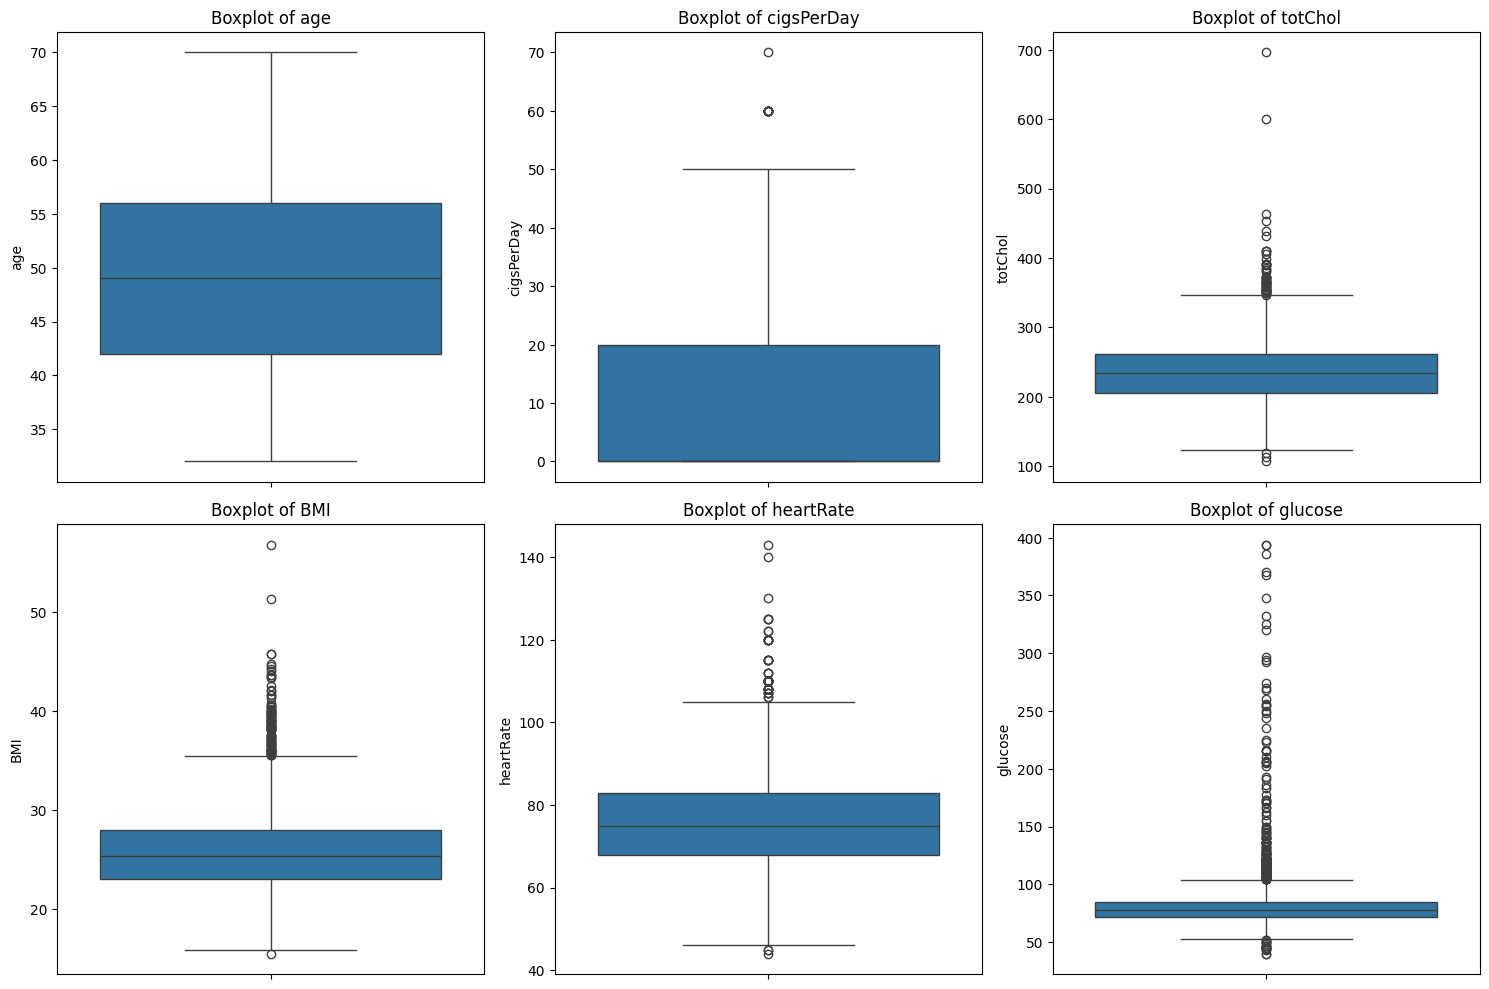

In [61]:
# FOR DETECTING OUTLIERS
# List of numeric features to check
num_cols = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [62]:
# IQR Clipping for outlier handling
def clip_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

# Columns where clipping will be applied
outlier_cols = ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

# Apply clipping to each column
for col in outlier_cols:
    clip_outliers(df, col)

print("Outliers clipped using IQR method.")


Outliers clipped using IQR method.


In [63]:
# Label encoding applied to 'education' because it's an ordinal categorical variable (1 = less education, 4 = more education),
# and SVM can work with these numeric levels after scaling.

# Step 3.1 - Encode categorical features (if any)
from sklearn.preprocessing import LabelEncoder

# 'education' is ordinal: 1-4, so label encoding is okay
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])

print("Categorical features encoded.")


Categorical features encoded.


In [64]:
# Step 3.2 - Scale features using StandardScaler
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Initialize scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled.")


Features scaled.


In [65]:
# We use stratify=y to ensure that the proportion of class 0 (no disease) and class 1 (disease)
# remains the same in both the training and testing sets. This helps avoid biased splits
# and ensures that both sets represent the real class distribution in the original dataset.
from sklearn.model_selection import train_test_split

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 3392
Testing samples: 848


In [66]:
from sklearn.svm import SVC

# Step 4.2 - Train the SVM model
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)#rbf: Uses radial basis function kernel (good for non-linear data) || class_weight='balanced' Automatically adjusts for class imbalance

# Fit on training data
svm_model.fit(X_train, y_train)

print("SVM model trained successfully.")

SVM model trained successfully.


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predict on test data
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probability for ROC-AUC

# Basic metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()  # for sensitivity/specificity

# Sensitivity & Specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print results
print("Evaluation Metrics:")
print(f"Accuracy      : {acc:.4f}")
print(f"Precision     : {prec:.4f}")
print(f"Recall        : {rec:.4f}")
print(f"F1 Score      : {f1:.4f}")
print(f"ROC-AUC Score : {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(cm)
print(f"\nSensitivity (TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")


Evaluation Metrics:
Accuracy      : 0.6828
Precision     : 0.2518
Recall        : 0.5504
F1 Score      : 0.3455
ROC-AUC Score : 0.6669

Confusion Matrix:
[[508 211]
 [ 58  71]]

Sensitivity (TPR): 0.5504
Specificity (TNR): 0.7065


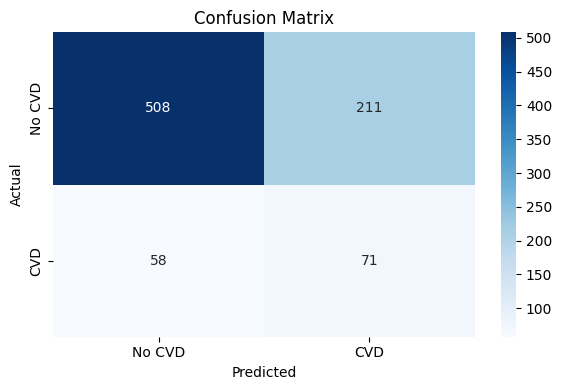

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No CVD', 'CVD'], yticklabels=['No CVD', 'CVD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

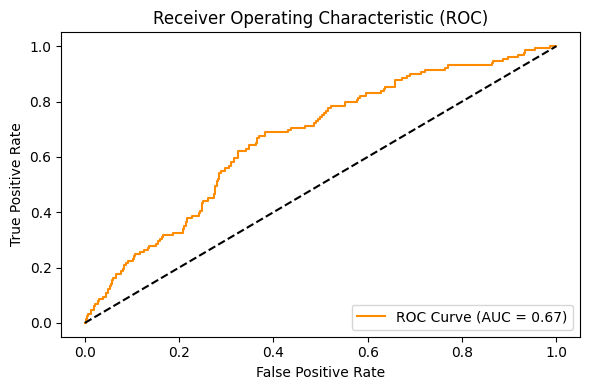

In [69]:
from sklearn.metrics import roc_curve

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [70]:
# We are using CTGAN because the dataset is imbalanced (very few Class 1 - Disease cases).
# CTGAN is designed for tabular data and allows conditional generation of specific classes.
# This helps us generate more samples only for Class 1 to balance the dataset before training.

In [71]:
# PCA is used here to reduce the high-dimensional medical features to just 2 components,
# allowing us to visualize how SVM separates the two classes using a decision boundary.

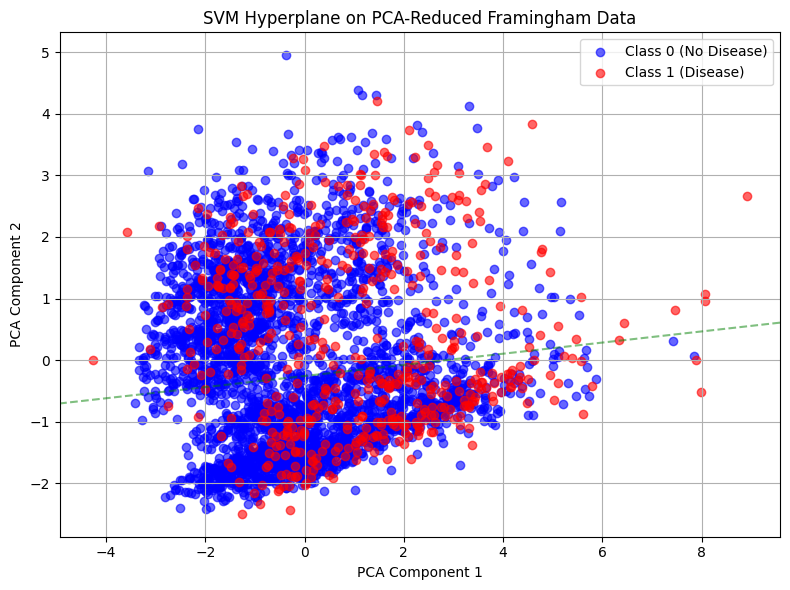

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Step 1: Load the dataset
df = pd.read_csv('../data/framingham.csv')

# Step 2: Drop rows with missing values (only for plotting purpose)
df = df.dropna()

# Step 3: Separate features and target
X = df.drop(columns=['TenYearCHD'])  # Features
y = df['TenYearCHD']                # Target

# Step 4: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Use PCA to reduce to 2 dimensions for plotting
# PCA helps reduce high-dimensional data to 2D so that we can visualize decision boundaries
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 6: Train a temporary SVM on the 2D data
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_pca, y)

# Step 7: Plotting decision boundary
def plot_svm_decision_boundary_2d(X, y, clf):
    plt.figure(figsize=(8, 6))

    # Plot points
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0 (No Disease)', alpha=0.6)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1 (Disease)', alpha=0.6)

    # # Plot support vectors
    # plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
    #             s=100, facecolors='none', edgecolors='black', label='Support Vectors')

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.8, linestyles=['--'])  # Hyperplane
    plt.contour(XX, YY, Z, colors='g', levels=[-1, 1], alpha=0.5, linestyles=['--'])  # Margins

    plt.title('SVM Hyperplane on PCA-Reduced Framingham Data')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Step 8: Call the function
plot_svm_decision_boundary_2d(X_pca, y.values, svm_clf)


In [73]:
# CTGAN is used to generate synthetic tabular data for the minority class (TenYearCHD = 1)
# so that we can balance the dataset and improve model performance on imbalanced data.

In [74]:
missing = df.isnull().sum()

In [75]:
print(missing)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [76]:
from ctgan import CTGAN
print("CTGAN import successful ")

CTGAN import successful 


In [77]:
# Only use Class 1 (disease) samples
class1_df = df[df['TenYearCHD'] == 1].reset_index(drop=True)

# Show shape and check
print("Original Class 1 samples:", class1_df.shape)
class1_df.head()

Original Class 1 samples: (557, 16)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
1,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
2,0,38,2.0,1,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.0,1
3,0,46,2.0,1,20.0,0.0,0,0,0,291.0,112.0,78.0,23.38,80.0,89.0,1
4,1,47,4.0,1,20.0,0.0,0,0,0,294.0,102.0,68.0,24.18,62.0,66.0,1


In [78]:
# We're training CTGAN only on Class 1 (disease) records to generate synthetic disease samples later for balancing the dataset

In [79]:
from ctgan import CTGAN

# Initialize CTGAN model with epochs
ctgan = CTGAN(epochs=300)

# Train only on Class 1 (disease cases)
ctgan.fit(class1_df)

print("CTGAN training completed!")

CTGAN training completed!


In [80]:
# We're generating synthetic Class 1 samples to balance the dataset with Class 0 samples using the trained CTGAN model

In [81]:
# Count how many Class 0 and Class 1 samples exist
class_counts = df['TenYearCHD'].value_counts()
class_0_count = class_counts[0]
class_1_count = class_counts[1]

# Calculate how many synthetic samples are needed to balance
samples_to_generate = class_0_count - class_1_count
print(f"Generating {samples_to_generate} synthetic Class 1 (disease) records...")

# Generate the synthetic samples
synthetic_df = ctgan.sample(samples_to_generate)

# Just to be sure, set 'TenYearCHD' to 1 for all generated rows
synthetic_df['TenYearCHD'] = 1

# Preview
synthetic_df.head()

Generating 2544 synthetic Class 1 (disease) records...


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,57,1.839374,1,-1.253055,1.393111,0,1,0,161.780371,172.839030,58.206772,21.552868,111.004881,137.542760,1
1,0,61,2.015839,1,-1.537083,0.909350,0,1,0,200.800771,102.896345,63.391369,26.366646,73.387829,73.454627,1
2,0,53,2.890290,1,0.440773,0.003617,0,1,0,252.103920,210.001921,64.852466,19.314892,107.708817,104.173911,1
3,0,58,1.143529,1,13.043504,0.009932,0,0,0,204.343694,128.018440,42.680443,23.084414,89.635689,90.283075,1
4,1,53,3.260530,1,-2.019534,-0.016131,0,1,0,253.165092,182.366048,88.208433,29.260101,87.290733,77.360205,1


In [82]:
# We're merging synthetic Class 1 samples with the original dataset and shuffling to ensure randomness
# Combine the original dataset with the synthetic samples
balanced_df = pd.concat([df, synthetic_df], ignore_index=True)

# Shuffle the dataset to remove any ordering bias
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Final class distribution check
print("New class distribution after GAN balancing:")
print(balanced_df['TenYearCHD'].value_counts())

New class distribution after GAN balancing:
TenYearCHD
1    3101
0    3101
Name: count, dtype: int64


In [83]:
from sklearn.model_selection import train_test_split

# Split features and target
X_bal = balanced_df.drop('TenYearCHD', axis=1)
y_bal = balanced_df['TenYearCHD']

# Train-test split with stratify to preserve class balance
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal
)

print(f"Balanced Train Samples: {len(X_train_bal)}")
print(f"Balanced Test Samples: {len(X_test_bal)}")

Balanced Train Samples: 4961
Balanced Test Samples: 1241


In [84]:
#Using a pipeline to scale features and train an SVM classifier on the balanced dataset
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline with scaling + SVM
svm_pipeline_bal = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True, random_state=42))
])

# Fit the model
svm_pipeline_bal.fit(X_train_bal, y_train_bal)

print("SVM model trained on balanced data!")


SVM model trained on balanced data!


In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Predict probabilities and classes
y_pred_bal = svm_pipeline_bal.predict(X_test_bal)
y_proba_bal = svm_pipeline_bal.predict_proba(X_test_bal)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test_bal, y_pred_bal)
precision = precision_score(y_test_bal, y_pred_bal)
recall = recall_score(y_test_bal, y_pred_bal)
f1 = f1_score(y_test_bal, y_pred_bal)
roc_auc = roc_auc_score(y_test_bal, y_proba_bal)

# Confusion matrix
cm = confusion_matrix(y_test_bal, y_pred_bal)
tn, fp, fn, tp = cm.ravel()
sensitivity = recall
specificity = tn / (tn + fp)

# Display metrics
print("Evaluation Metrics (After Balancing):")
print(f"Accuracy      : {accuracy:.4f}")
print(f"Precision     : {precision:.4f}")
print(f"Recall        : {recall:.4f}")
print(f"F1 Score      : {f1:.4f}")
print(f"ROC-AUC Score : {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(cm)
print(f"\nSensitivity (TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")

Evaluation Metrics (After Balancing):
Accuracy      : 0.8654
Precision     : 0.9364
Recall        : 0.7839
F1 Score      : 0.8534
ROC-AUC Score : 0.9293

Confusion Matrix:
[[588  33]
 [134 486]]

Sensitivity (TPR): 0.7839
Specificity (TNR): 0.9469


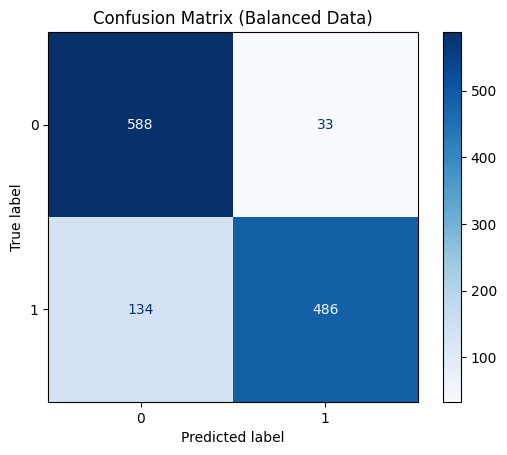

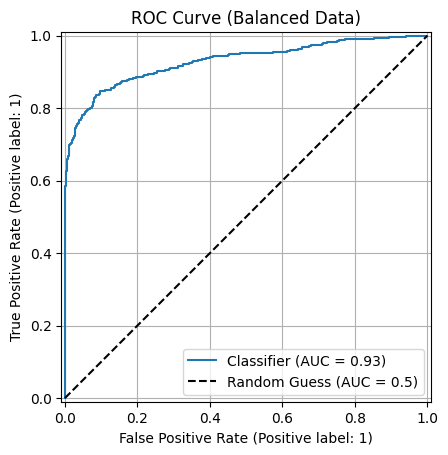

In [86]:
import matplotlib.pyplot as plt

# Confusion matrix display
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_cm.plot(cmap="Blues")
plt.title("Confusion Matrix (Balanced Data)")
plt.show()

# ROC curve display
RocCurveDisplay.from_predictions(y_test_bal, y_proba_bal)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')  # Dashed diagonal line
plt.title("ROC Curve (Balanced Data)")
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

In [87]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


C:\Users\bvdas\AppData\Local\Temp\ipykernel_11212\803408859.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='male', y='TenYearCHD', data=gender_cvd_risk, palette='Set2')


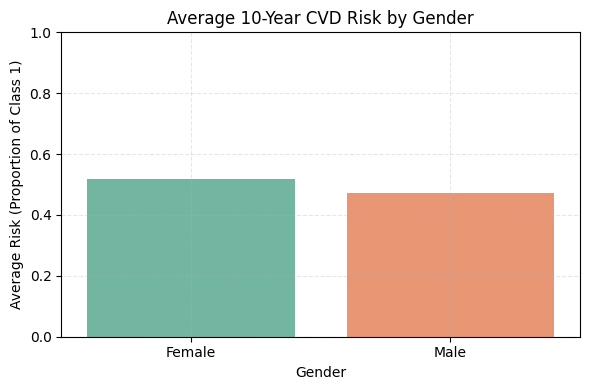

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with your actual balanced DataFrame name if different
df = balanced_df.copy()

# Group by 'male' and calculate average CVD risk (TenYearCHD)
gender_cvd_risk = df.groupby('male')['TenYearCHD'].mean().reset_index()

# Map gender from 0/1 to labels for readability
gender_cvd_risk['male'] = gender_cvd_risk['male'].map({0: 'Female', 1: 'Male'})

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x='male', y='TenYearCHD', data=gender_cvd_risk, palette='Set2')
plt.title('Average 10-Year CVD Risk by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Risk (Proportion of Class 1)')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\bvdas\AppData\Local\Temp\ipykernel_11212\18516363.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_risk = df.groupby('age_group')['TenYearCHD'].mean().reset_index()
C:\Users\bvdas\AppData\Local\Temp\ipykernel_11212\18516363.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='TenYearCHD', data=age_risk, palette='magma')


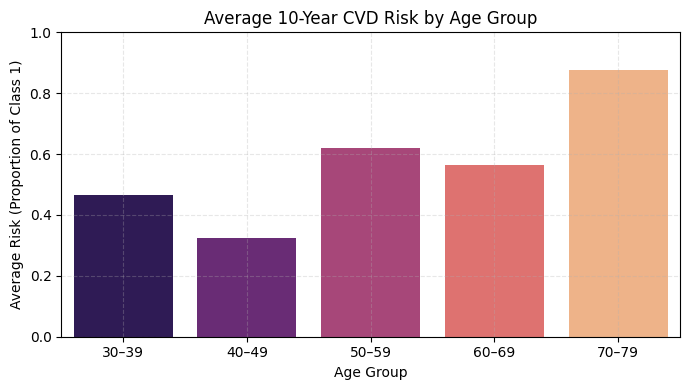

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Copy to avoid modifying original
df = balanced_df.copy()

# Define age bins and labels (adjust if needed)
age_bins = [29, 39, 49, 59, 69, 79]
age_labels = ['30–39', '40–49', '50–59', '60–69', '70–79']

# Create age group column
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Group by age group and calculate average CVD risk
age_risk = df.groupby('age_group')['TenYearCHD'].mean().reset_index()

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x='age_group', y='TenYearCHD', data=age_risk, palette='magma')
plt.title('Average 10-Year CVD Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Risk (Proportion of Class 1)')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\bvdas\AppData\Local\Temp\ipykernel_11212\1988717937.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chol_risk = df.groupby('chol_group')['TenYearCHD'].mean().reset_index()
C:\Users\bvdas\AppData\Local\Temp\ipykernel_11212\1988717937.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='chol_group', y='TenYearCHD', data=chol_risk, palette='coolwarm')


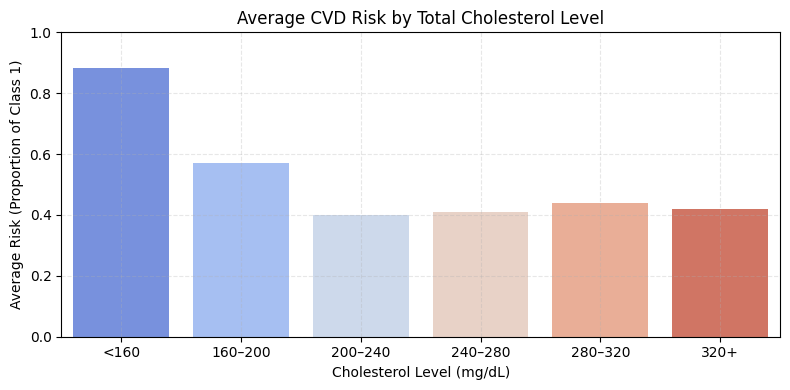

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Work on a copy
df = balanced_df.copy()

# Define cholesterol bins (you can tweak these for finer control)
chol_bins = [0, 160, 200, 240, 280, 320, 500]
chol_labels = ['<160', '160–200', '200–240', '240–280', '280–320', '320+']

# Create a new cholesterol level category
df['chol_group'] = pd.cut(df['totChol'], bins=chol_bins, labels=chol_labels)

# Group by cholesterol group and calculate avg CVD risk
chol_risk = df.groupby('chol_group')['TenYearCHD'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x='chol_group', y='TenYearCHD', data=chol_risk, palette='coolwarm')
plt.title('Average CVD Risk by Total Cholesterol Level')
plt.xlabel('Cholesterol Level (mg/dL)')
plt.ylabel('Average Risk (Proportion of Class 1)')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\bvdas\AppData\Local\Temp\ipykernel_11212\2140915824.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bp_risk = balanced_df.groupby('BP_Category')['TenYearCHD'].mean().reset_index()
C:\Users\bvdas\AppData\Local\Temp\ipykernel_11212\2140915824.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BP_Category', y='TenYearCHD', data=bp_risk, palette='Reds')


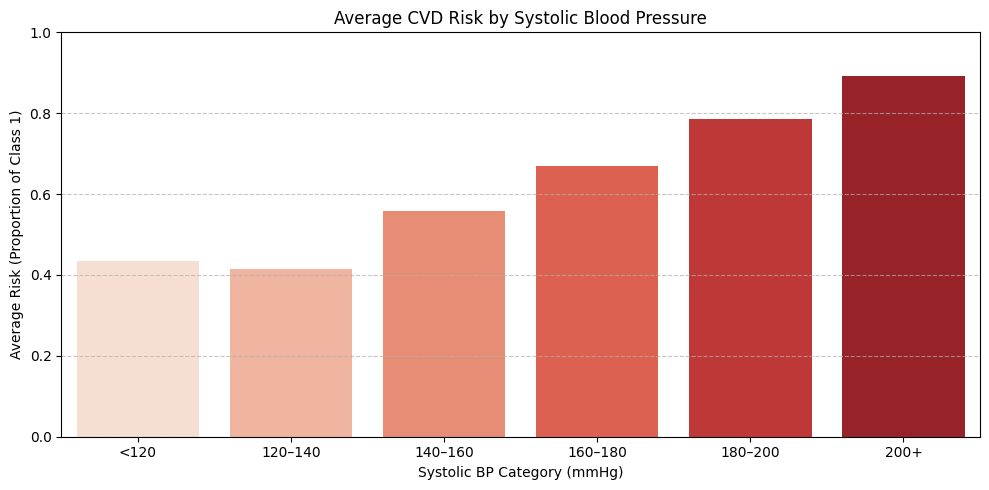

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define BP bins and labels
bp_bins = [0, 120, 140, 160, 180, 200, 300]
bp_labels = ['<120', '120–140', '140–160', '160–180', '180–200', '200+']

# Create BP category
balanced_df['BP_Category'] = pd.cut(balanced_df['sysBP'], bins=bp_bins, labels=bp_labels)

# Calculate mean CVD risk per BP category
bp_risk = balanced_df.groupby('BP_Category')['TenYearCHD'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='BP_Category', y='TenYearCHD', data=bp_risk, palette='Reds')
plt.title('Average CVD Risk by Systolic Blood Pressure')
plt.xlabel('Systolic BP Category (mmHg)')
plt.ylabel('Average Risk (Proportion of Class 1)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [92]:
# Save the balanced dataset to CSV for future use
balanced_df.to_csv(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\data\framingham_balanced.csv", index=False)

In [93]:
import joblib
# Save the model
joblib.dump(svm_model, r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\svm_model.pkl")

['C:\\Users\\bvdas\\Desktop\\CODING\\cardio_new_project\\models\\svm_model.pkl']

In [94]:
# Load the saved model
loaded_model = joblib.load(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\svm_model.pkl")

# # Use it for prediction
# prediction = loaded_model.predict(X_new_scaled)  # Replace with your input

In [95]:
joblib.dump(scaler, r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\svm_scaler.pkl")

['C:\\Users\\bvdas\\Desktop\\CODING\\cardio_new_project\\models\\svm_scaler.pkl']

In [96]:
scaler = joblib.load(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\models\svm_scaler.pkl")


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # IMPORTANT: Must fit it before saving

,copy,True
,with_mean,True
,with_std,True


In [98]:
import joblib
joblib.dump(scaler, 'svm_scaler.pkl')

['svm_scaler.pkl']

In [99]:
# import joblib
# import numpy as np

# # Load the saved scaler and model
# scaler = joblib.load(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\SVM\models\svm_scaler.pkl")
# model = joblib.load(r"C:\Users\bvdas\Desktop\CODING\cardio_new_project\SVM\models\svm_model.pkl")

# # Collect user input
# print("Enter the following details:")

# male = int(input("Gender (1 = Male, 0 = Female): "))
# age = int(input("Age: "))
# education = int(input("Education Level (1 to 4): "))
# currentSmoker = int(input("Current Smoker (1 = Yes, 0 = No): "))
# cigsPerDay = float(input("Cigarettes per Day: "))
# BPMeds = int(input("On BP Medication? (1 = Yes, 0 = No): "))
# prevalentStroke = int(input("History of Stroke? (1 = Yes, 0 = No): "))
# prevalentHyp = int(input("Prevalent Hypertension? (1 = Yes, 0 = No): "))
# diabetes = int(input("Diabetes? (1 = Yes, 0 = No): "))
# totChol = float(input("Total Cholesterol: "))
# sysBP = float(input("Systolic BP: "))
# diaBP = float(input("Diastolic BP: "))
# BMI = float(input("BMI: "))
# heartRate = float(input("Heart Rate: "))
# glucose = float(input("Glucose Level: "))

# # Create the input array
# user_data = np.array([[male, age, education, currentSmoker, cigsPerDay, BPMeds,
#                        prevalentStroke, prevalentHyp, diabetes, totChol, sysBP,
#                        diaBP, BMI, heartRate, glucose]])

# # Scale the input data
# user_data_scaled = scaler.transform(user_data)

# # Make prediction
# prediction = model.predict(user_data_scaled)

# # Output result
# if prediction[0] == 1:
#     print("\nThe model predicts a HIGH RISK of cardiovascular disease.")
# else:
#     print("\nThe model predicts a LOW RISK of cardiovascular disease.")
